In [17]:
import cv2
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt
import os
import scipy
import yaml
import random

In [18]:
path_to_dir= "../sem_simulator/data/in/"

den_dir = os.path.join(path_to_dir, 'denoised')

bin_dir = os.path.join(path_to_dir, 'iter2part12_part13_E200_G73_mask_scunet')
orig_dir = os.path.join(path_to_dir, 'raw')
# other = os.path.join(path_to_dir, 'mask_scunet_correct')
filenames_masks = os.listdir(bin_dir)
# filenames.sort()
print(f'Total: {len(filenames_masks)} files')
# save_dir = os.path.join(path_to_dir, 'iter2part12_part13_E200_G73_sem_masks')
save_dir = os.path.join(path_to_dir, 'semantic')

os.makedirs(save_dir, exist_ok=True)

Total: 51 files


In [19]:
def detect_contour(img):
    cont, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    cont_image = np.zeros_like(img)
    cv2.drawContours(cont_image, cont, -1, 255, 0)
    plt.imshow(cont_image) 
    
    return cont, cont_image

In [14]:
def dilate_contour(contour, distance):
    matrix = cv2.moments(contour)
    cx = int(matrix['m10']/matrix['m00'])
    cy = int(matrix['m01']/matrix['m00'])
    contour = contour - [cx, cy]
    contour = (1 + distance / np.linalg.norm(contour, axis=1, keepdims=True)) * contour
    contour = contour + [cx, cy]
    return contour.astype(np.int32)

In [ ]:
for contour in contours:
    # Создаем копию контура
    contour_copy = contour.copy()
    
    # Преобразуем контур в numpy массив точек
    contour_array = np.array(contour_copy)
    
    # Выполняем аппроксимацию контура с новым размером (например, 20 пикселей)
    epsilon = 20  # Измените это значение в соответствии с вашим требованием
    approximated_contour = cv2.approxPolyDP(contour_array, epsilon, True)
    
    # Рисуем аппроксимированный контур на изображении
    cv2.drawContours(image_copy, [approximated_contour], 0, (255, 0, 0), 2)

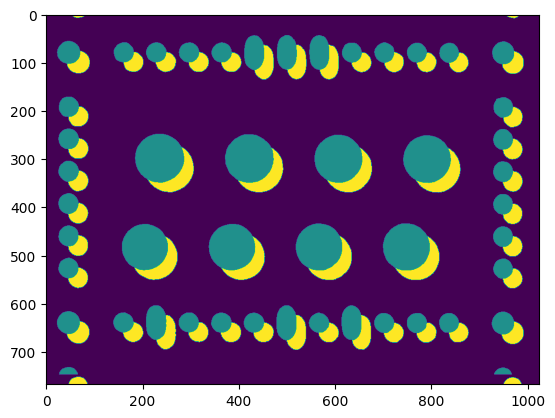

In [43]:
for file_name in filenames_masks[0:1]:
    bin_mask = cv2.imread(os.path.join(bin_dir, file_name), 0)
    # plt.imshow(bin_mask)
    cont, cont_image = detect_contour(bin_mask)
    image = np.zeros_like(bin_mask)
    cv2.drawContours(image, cont, -1, 255, -1)

    # dst = scale_contours(cont, bin_mask)
    # print(dst)
    # d = random.randint(2,21)
    for c in cont:
        c_copy = c.copy()
        c_copy = np.array(c_copy)
        eps = random.randint(2,21)
        eps = (eps/10000) * cv2.arcLength(c, True)

        offset = 20
        approximated_contour = cv2.approxPolyDP(c_copy, eps, True)
    
    # Изменение координат каждой точки контура
        scaled_contour = np.array([
            [
                point[0][0] - offset,
                point[0][1] - offset
            ] for point in approximated_contour
        ])

        cv2.drawContours(image,  [scaled_contour], -1, 128, -1)

   

    # cv2.imwrite(os.path.join(save_dir, file_name), cont_image.astype(np.uint8))

    plt.imshow(image)

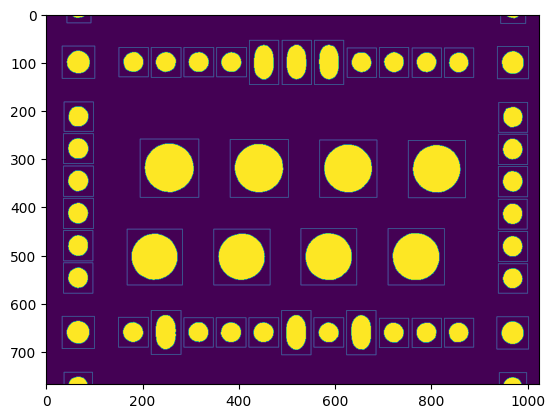

In [29]:
image = bin_mask.copy()
for contour in cont:
    # Получение ограничивающего прямоугольника вокруг контура
    x, y, w, h = cv2.boundingRect(contour)
    
    # Увеличение ширины и высоты ограничивающего прямоугольника на 20 пикселей
    enlarged_w = w + 20
    enlarged_h = h + 20
    
    # Расширение ограничивающего прямоугольника
    enlarged_x = x - 10
    enlarged_y = y - 10
    
    # Создание нового контура внутри расширенного прямоугольника
    new_contour = np.array([
        [enlarged_x, enlarged_y],
        [enlarged_x + enlarged_w, enlarged_y],
        [enlarged_x + enlarged_w, enlarged_y + enlarged_h],
        [enlarged_x, enlarged_y + enlarged_h]
    ])
    
    # Рисование нового контура на копии изображения
    cv2.drawContours(image, [new_contour], -1, 128, 0)


cv2.drawContours(image, cont, -1, 255, -1)
plt.imshow(image)

/tmp/ipykernel_1937/4048454056.py:6: RuntimeWarning: divide by zero encountered in divide
  contour = (1 + distance / np.linalg.norm(contour, axis=1, keepdims=True)) * contour
/tmp/ipykernel_1937/4048454056.py:6: RuntimeWarning: invalid value encountered in multiply
  contour = (1 + distance / np.linalg.norm(contour, axis=1, keepdims=True)) * contour


KeyboardInterrupt: 

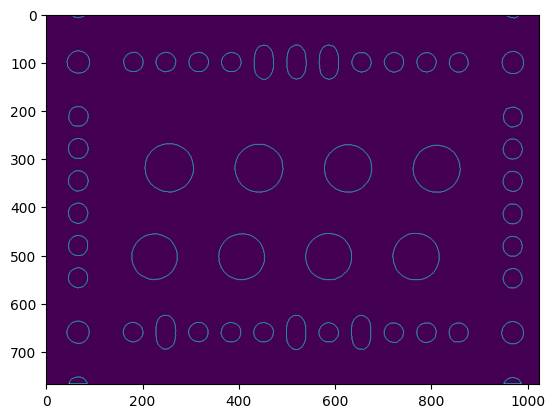

In [16]:
for file_name in filenames_masks[0:1]:
    bin_mask = cv2.imread(os.path.join(bin_dir, file_name), 0)
    # plt.imshow(bin_mask)
    cont, cont_image = detect_contour(bin_mask)
    # dst = scale_contours(cont, bin_mask)
    # print(dst)
    d = random.randint(2,21)
    for c in cont:
        dilated_contour = dilate_contour(c, d)
        cv2.drawContours(cont_image,  [dilated_contour], 0, 128, -1)
    # dst_np = [np.array(contour, dtype=np.int32) for contour in dst]

    # cv2.drawContours(cont_image, dst_np, -1, 128, -1)
    cv2.drawContours(cont_image, cont, -1, 255, -1)

    # cv2.imwrite(os.path.join(save_dir, file_name), cont_image.astype(np.uint8))

    plt.imshow(cont_image)